## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 1 #

### esercizio 1.01 

In questo esercizio abbiamo stimato il valore dell'integrale:  $\langle r \rangle = \int_0^1 r dr$. Abbiamo utilizzato un generatore di numeri pseudocasuali, così da stimare il valore dell'integrale proprio come media di numeri generati casualmente da 0 e 1.
Abbiamo fatto la media utilizzando il metodo dei blocchi. Per farlo abbiamo diviso gli M lanci casuali in N blocchi ciascuno dei quali formato da L elementi. Per ciascun blocco abbiamo stimato un valore medio $A_i$.
Dopodichè come valore medio totale abbiamo utilizzato la media dei valori medi, per quanto riguarda invece l'incertezza abbiamo calcolato le grandezze:
 $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
 
Sapendo che l'incertezza può essere stimata nel seguente modo:
 $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
 
abbiamo stimato pertanto il valore dell'incertezza sulla media:
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

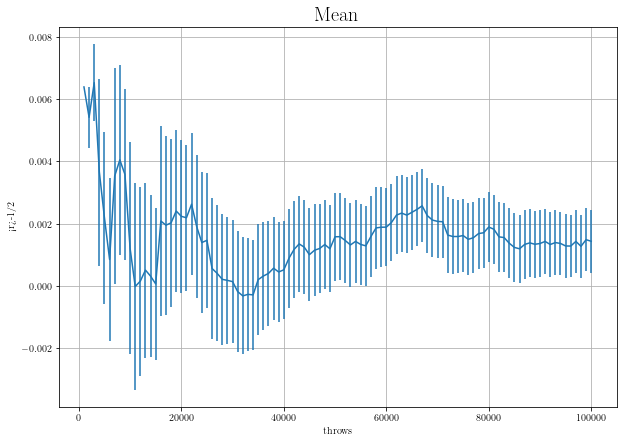

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x, f, error = np.loadtxt("output1.01.txt", usecols=(0,1,2), delimiter=', ', unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error)
plt.xlabel('throws')
plt.ylabel('<r>-1/2')
plt.title('Mean', fontsize=20)

plt.grid(True)
plt.show()

In questo grafico abbiamo riportato il valore di r trovato meno quello atteso (1/2), in funzione del numero di lanci. In particolare abbiamo eseguito 100000 lanci divisi in 100 blocchi da 10000 lanci ciascuno.
L'errore è stato stimato col metodo dei blocchi, sul valor medio di un blocco abbiamo considerato le stime di tutti i blocchi precedenti. Risulta interessante vedere come giustamente, al crescere del numero di blocchi, il valore dell'errore diminuisca e il valore medio si stabilizzi in corrispondenza ad un valore compatibile con quello atteso (nel caso di questo grafico, pari a 0).

In maniera analoga abbiamo poi stimato il valore di $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

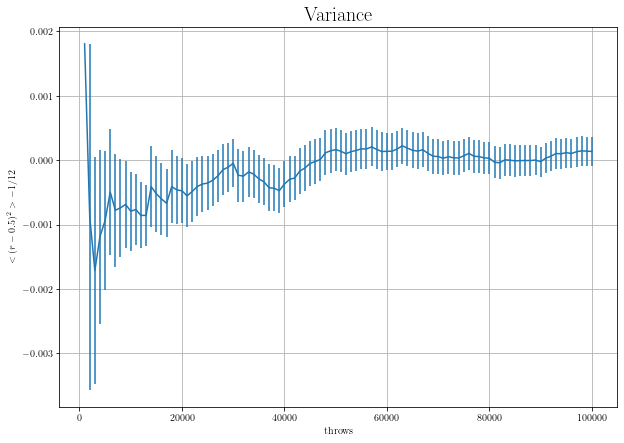

In [9]:
x, f, error = np.loadtxt("output1.02.txt", usecols=(0,1,2), delimiter=', ', unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error)
plt.xlabel('throws')
plt.ylabel('$<(r-0.5)^2> -1/12$')
plt.title('Variance', fontsize=20)

plt.grid(True)
plt.show()

Anche in questo caso riportiamo la differenza tra il valore medio trovato e quello atteso in funzione del numero di lanci con l'incertezza stimata col metodo dei blocchi. I risultati trovati risultano compatibili con quelli attesi.

Successivamente abbiamo implementato un test del chi-quadro per testare l'effettiva randomicità del nostro generatore di numeri pseudo-casuali. Abbiamo diviso l'intervallo $[0,1]$ in $M = 100$ intervalli e abbiamo effettuato $N = 10000$ lanci. Abbiamo eseguito tale test per 100 volte.



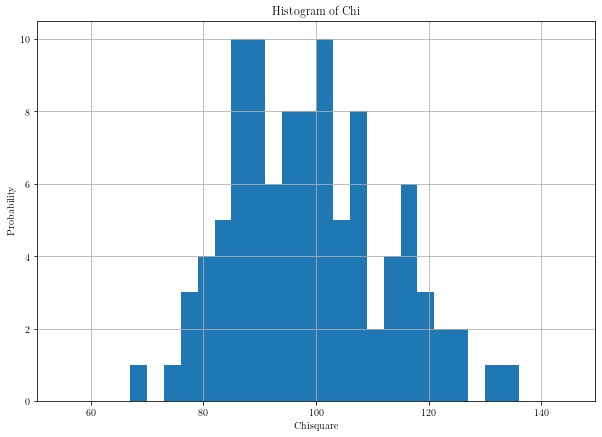

In [13]:
n_bins = 30
x = np.loadtxt("output1.03.txt")
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(x, n_bins, range=(55,145))

plt.xlabel('Chisquare')
plt.ylabel('Probability')
plt.title('Histogram of Chi')
plt.grid(True)


plt.show()

Abbiamo riportato un istogramma che rappresenta la distribuzione dei valori di Chi trovati. Avendo 100 gradi di libertà ci aspettavamo un valore prossimo a 100.

### esercizio 1.02 

Utilizzando il metodo dell'inversione della distribuzione cumulativa abbiamo implementato due nuove distribuzioni al nostro generatore, una generica distribuzione esponentiale </font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, e una generica distribuzione di Cauchy-Lorentz </font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$

Abbiamo studiato le due nuove distribuzioni insieme alla già implementata distribuzione uniforme allo scopo di verificare il Teorema del Limite Centrale (CLT). Essendo la distribuzione uniforme e esponenziale a varianza finita è effettivamente possibile applicare il CLT, discorso opposto le la distribuzione lorentziana (a varianza infinita).

Di seguito riportiamo degli istogrammi ottenuti riempendo con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), con $x_i$ una variabile random ottenuta lanciando ripettivamente una dado standard, un dado esponenziale (con $\lambda = 1$) e un dado lorentziano (con $\mu = 0$ e $\Gamma = 1)$

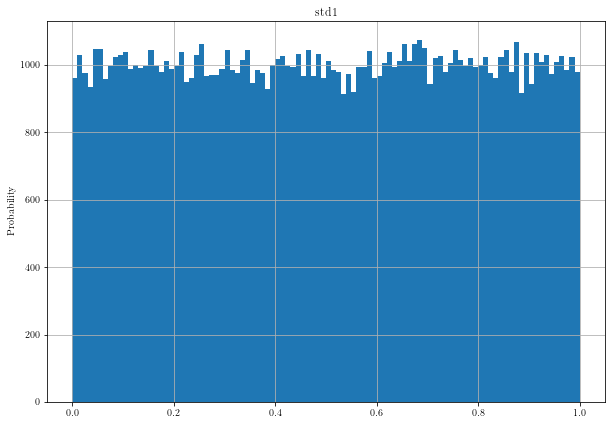

<Figure size 432x288 with 0 Axes>

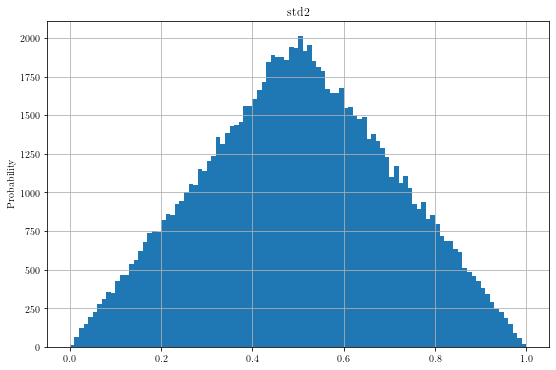

<Figure size 432x288 with 0 Axes>

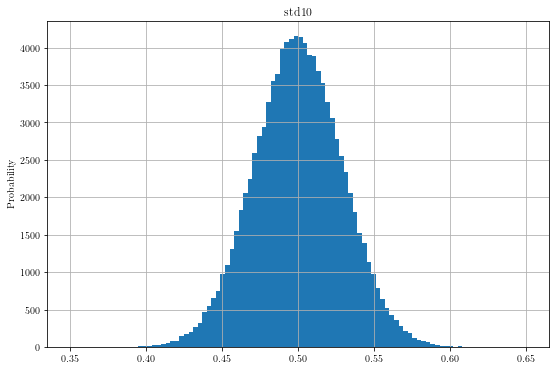

<Figure size 432x288 with 0 Axes>

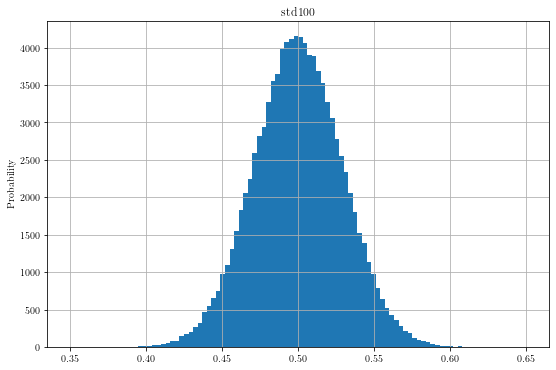

In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

n_bins = 100
x = np.loadtxt("std1.txt")
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(x, n_bins, range=(0,1))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std1')
plt.grid(True)

plt.figure()
x = np.loadtxt("std2.txt")
plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(x, n_bins, range=(0,1))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std2')
plt.grid(True)

plt.figure()
x = np.loadtxt("std100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0.35,0.65))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std10')
plt.grid(True)

plt.figure()
x = np.loadtxt("std100.txt")
plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(x, n_bins, range=(0.35,0.65))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std100')
plt.grid(True)


plt.show();

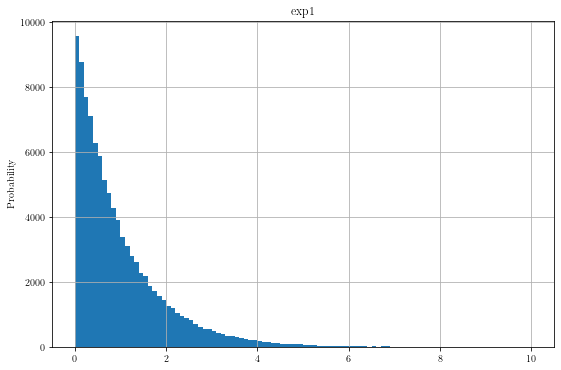

<Figure size 432x288 with 0 Axes>

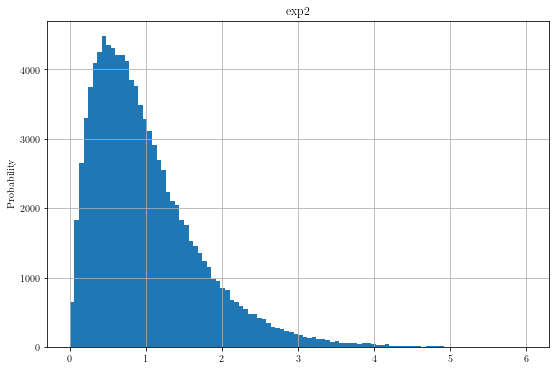

<Figure size 432x288 with 0 Axes>

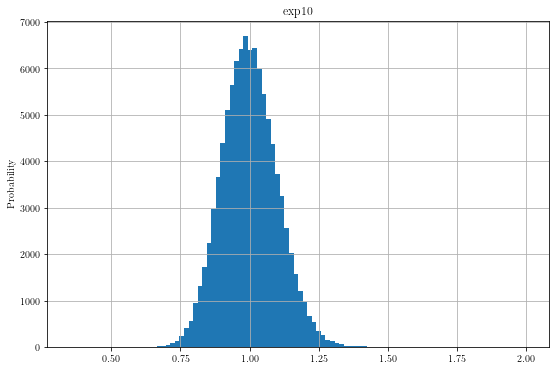

<Figure size 432x288 with 0 Axes>

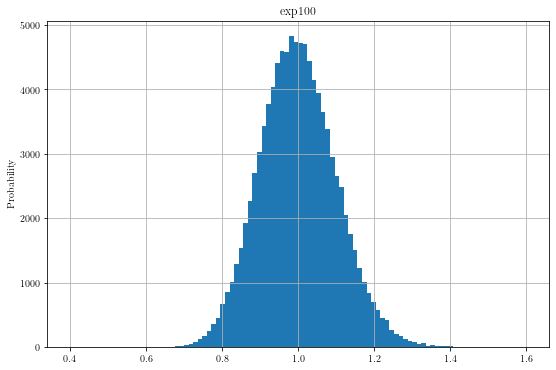

In [22]:
n_bins = 100
x = np.loadtxt("exp1.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,10))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp1')
plt.grid(True)

plt.figure()
x = np.loadtxt("exp2.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,6))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp2')
plt.grid(True)

plt.figure()
x = np.loadtxt("exp100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0.35,2))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp10')
plt.grid(True)

plt.figure()
x = np.loadtxt("exp100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0.4,1.6))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp100')
plt.grid(True)


plt.show()

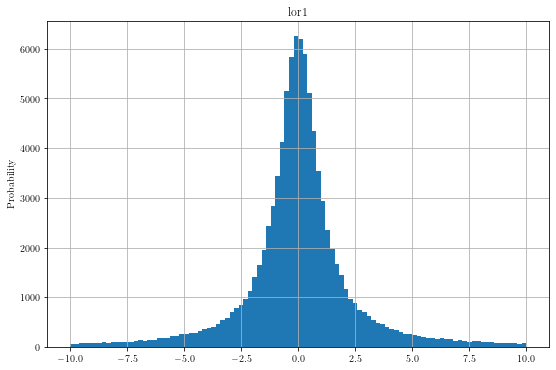

<Figure size 432x288 with 0 Axes>

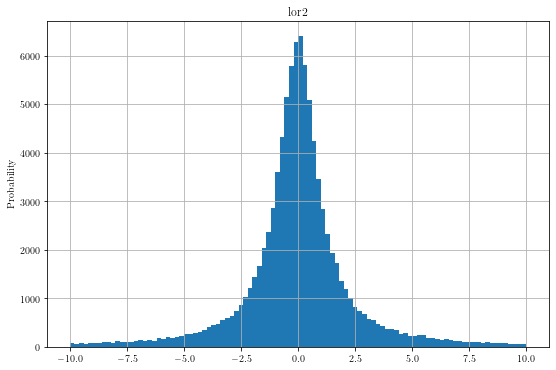

<Figure size 432x288 with 0 Axes>

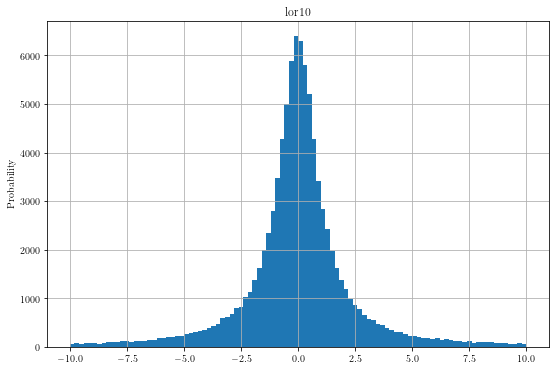

<Figure size 432x288 with 0 Axes>

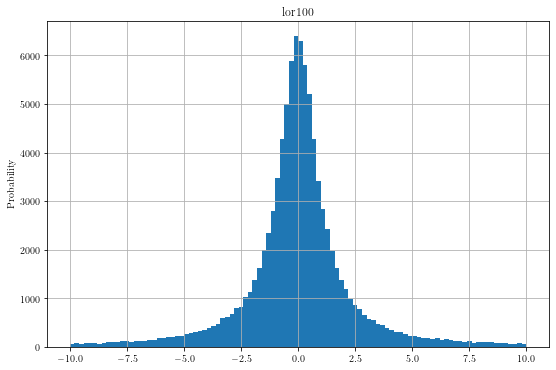

In [21]:
n_bins = 100
x = np.loadtxt("lor1.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-10,10))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor1')
plt.grid(True)

plt.figure()
x = np.loadtxt("lor2.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-10,10))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor2')
plt.grid(True)

plt.figure()
x = np.loadtxt("lor100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-10,10))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor10')
plt.grid(True)

plt.figure()
x = np.loadtxt("lor100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-10,10))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor100')
plt.grid(True)


plt.show()

Per le distribuzioni che ne rispettavano le ipotesi abbiamo verificato il CLT: a grande N sia la distribuzione uniforme che quella esponenziale hanno come bacino di attrazione la distribuzione gausssiana. La distribuzione Lorentziana rimane invece tale: il suo bacino di attrazione è la distribuzione stessa.

### esercizio 1.02

Abbiamo poi simulato l'esperimento di Buffon, storico esperimento utile per la stima del valore di $\pi$.
Dato un ago di lunghezza $L$, l'esperimento consiste nel lanciare tale ago su un piano avente disegnate delle righe orizzontali equispaziate a distanza d, con $d>L$. La probabilità che l'ago intersechi una riga è $P = \frac{2L}{\pi d}$. Lanciando l'ago $N_{thr}$ volte e contando le $N_{hit}$ di queste in cui interseca una riga, abbiamo stimato il valore di $\pi$ come:
 $\pi = \frac{2L}{Pd} = \frac{2L*N_{thr}}{N_{hit}d}$
 
 Abbiamo stimato il valore medio $\frac{N_{hit}}{N_{thr}}$ con il metodo dei blocchi, usando 100 blocchi da 50000 lanci l'uno, stimando così l'errore sulla media trovata. Abbiamo poi con la già citata formula stimato $\pi$ e il rispettivo errore (con il metodo della propagazione degli errori): 

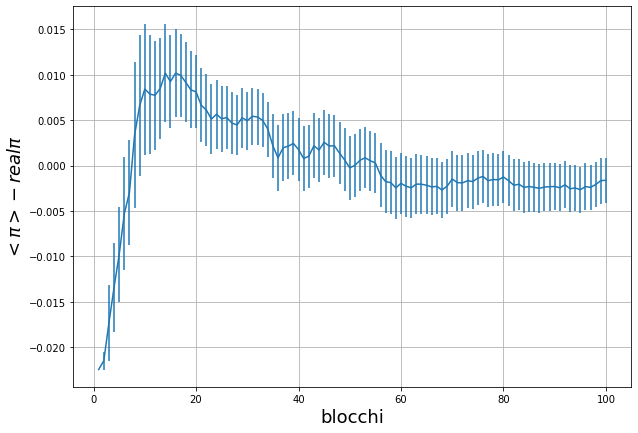

Estimate:
3.139973203589793
Uncertainty:
0.00249516


In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("pi.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('$<\pi>-real\pi$', fontsize=18)
plt.grid(True)
plt.show()

print("Estimate:")
print(f[-1] + math.pi)
print("Uncertainty:")
print(error[-1])



I risultati ottenuti sono compatibili con quelli attesi. In questo caso la difficoltà è stata generare un angolo in maniera casuale, senza però poter utilizzare il valore di pi greco. Per fare questo abbiamo utilizzato un metodo di accetto-rigetto: per generare un angolo abbiamo prima generato un punt in un quadrato di lato 2 centrato nell'origine, accertandoci però che questo punto si trovasse anche all'interno della circonferenza unitaria. Quando il punto rispettava questo vincolo ne ricavavamo un angolo considerando l'angolo che il sudetto punto faceva con l'asse delle ascisse.